# Task 2: Investigate Customer Demographics

Bussiness questions

- Are there differences in the age of customers between regions? If so, can we predict the age of a customer in a region based on other demographic data?

- Is there any correlation between age of a customer and if the transaction was made online or in the store? Or do other factors correlate to an online or in-store transaction?

The structure of this task if framed basically in the **step 5** of the following graphic, which corresponds to perform the in-depth analysis:

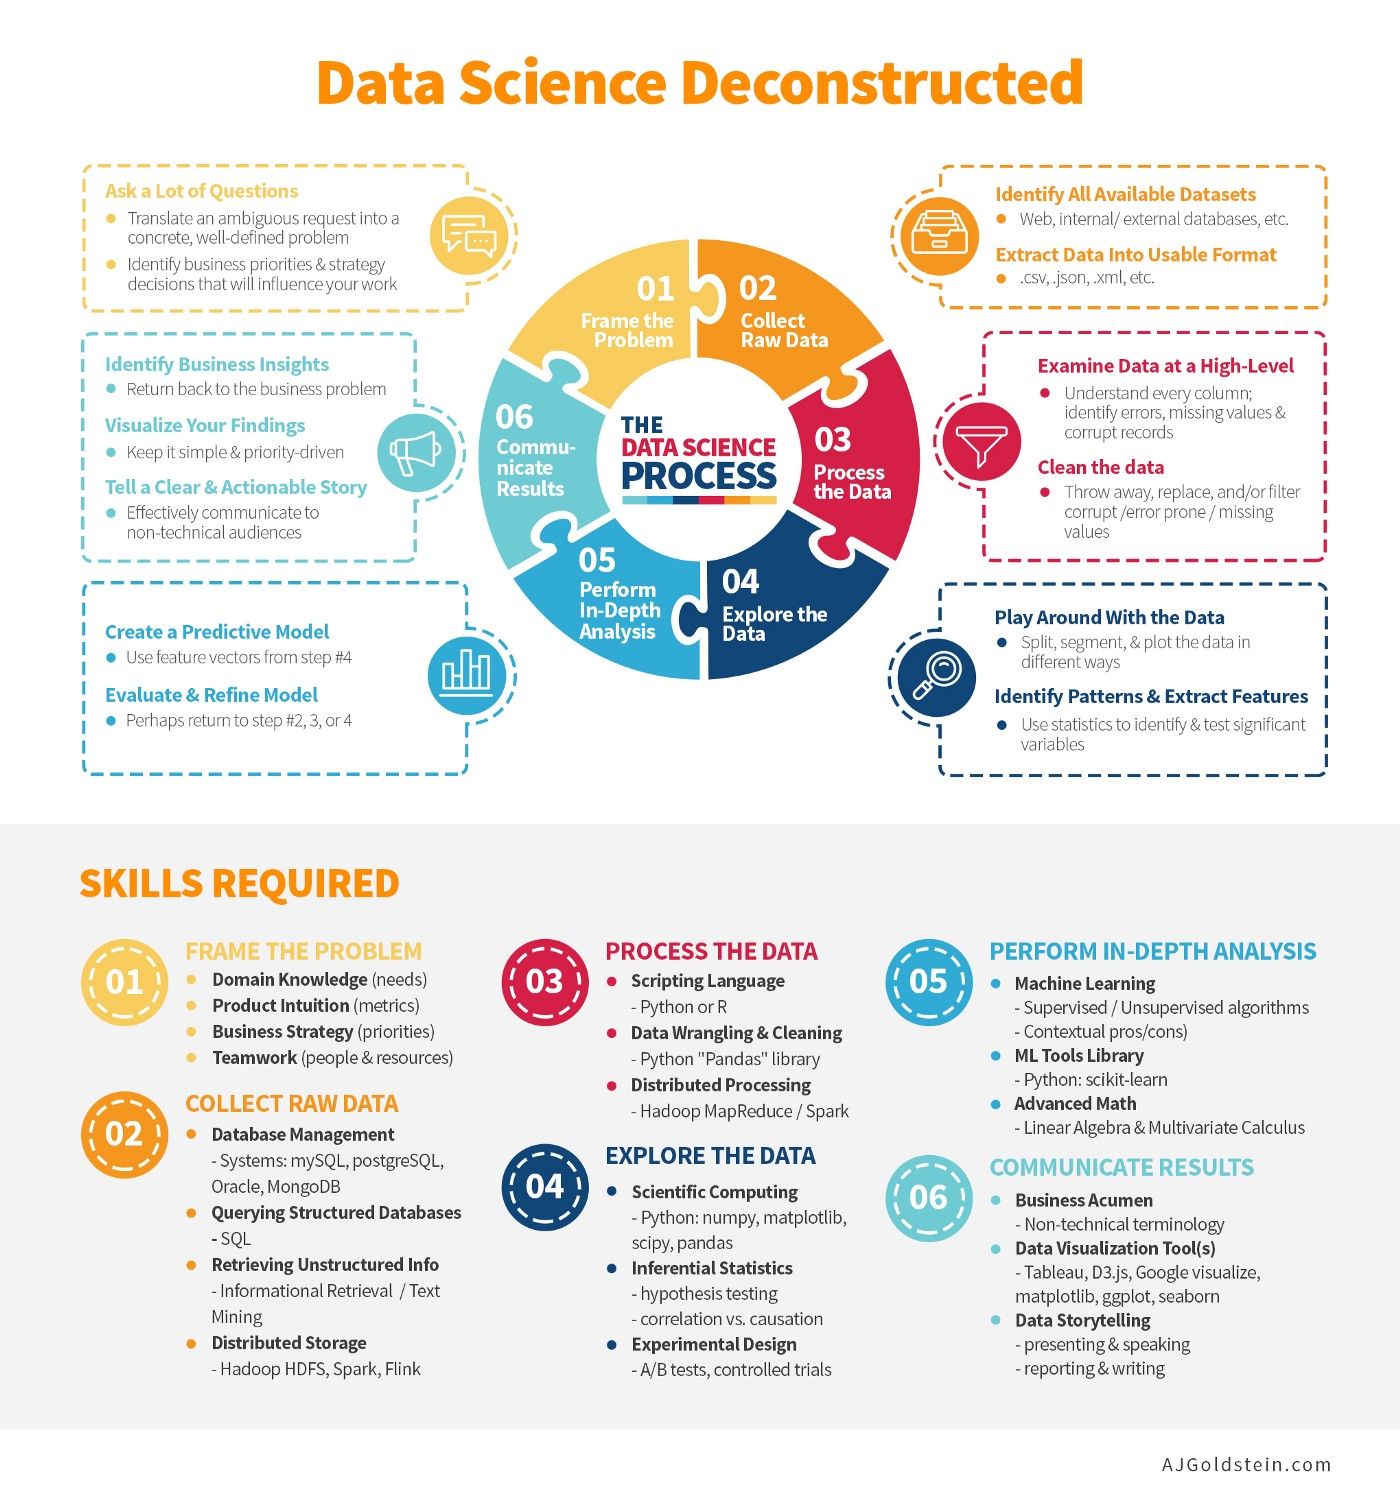

Image source: 

*AJ Goldstein. (2017, November 12). Deconstructing Data Science: Breaking The Complex Craft Into It’s Simplest Parts. Retrieved February 26, 2020, from Medium website: https://medium.com/the-mission/deconstructing-data-science-breaking-the-complex-craft-into-its-simplest-parts-15b15420df21*

## Question bussines 1

- Are there differences in the age of customers between regions? If so, can we predict the age of a customer in a region based on other demographic data?

### Are there differences in the age of customers between regions?

Yes, in the previous report

In [4]:
import numpy as np
import pandas as pd 
#import pandas_profiling
import matplotlib.pyplot as plt

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score



#helper
%matplotlib inline

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
data = pd.read_csv('Demographic_Data.csv')
data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


In [13]:
#features
X = data.iloc[:,0:4]
print('Summary of feature sample')
X.head()


Summary of feature sample


,in-store,age,items,amount
0,0,37,4,281.03
1,0,35,2,219.51
2,1,45,3,1525.70
3,1,46,3,715.25
4,1,33,4,1937.50


In [14]:
#dependent varaible
y = data['region']

In [15]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [16]:
#Modeling (Classification)
algo = DecisionTreeClassifier()
model = algo.fit(X_train,y_train)

In [17]:
#Predictions
preds = model.predict(X_test)

In [18]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.39      0.40      0.39      4857
           2       0.91      0.90      0.91      5945
           3       0.38      0.38      0.38      5389
           4       0.54      0.53      0.53      7809

    accuracy                           0.56     24000
   macro avg       0.55      0.55      0.55     24000
weighted avg       0.56      0.56      0.56     24000



In [19]:
from sklearn.tree import plot_tree

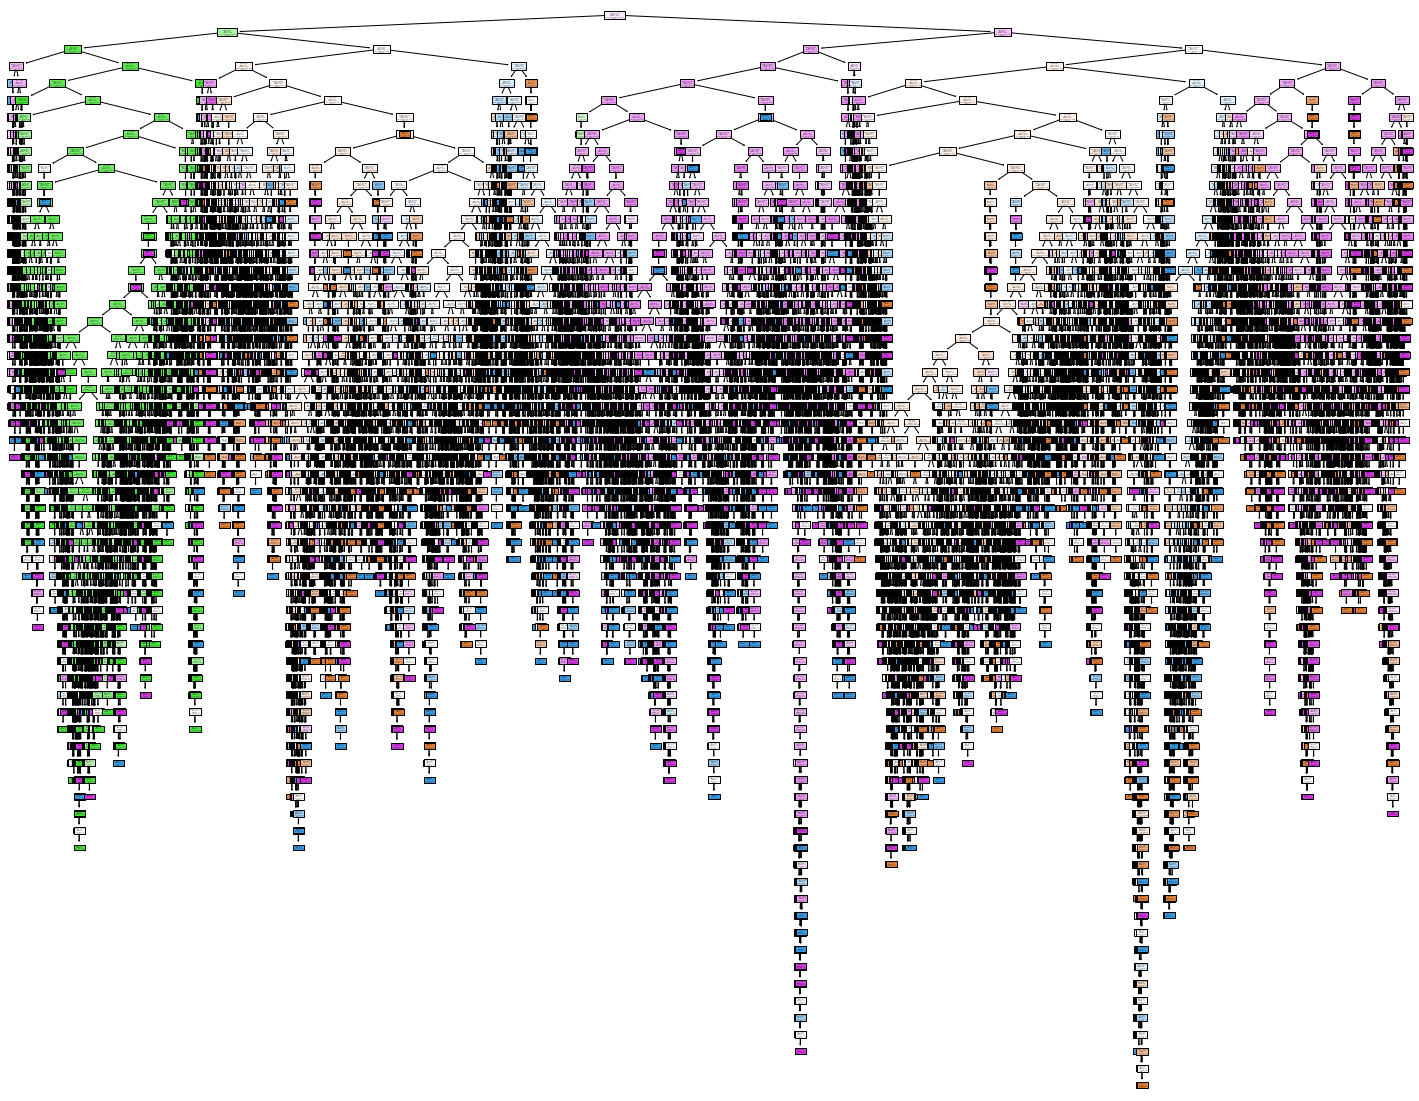

In [20]:
fig = plt.figure(figsize=(25,20))
tree = plot_tree(model, feature_names=X.columns,class_names=['0', '1', '2', '3'], filled=True)